<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


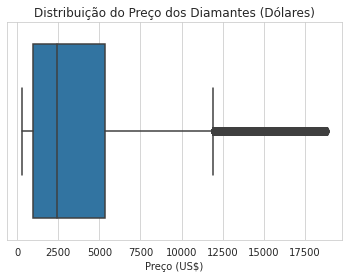

In [2]:
# gráfico do exercício 1

# Carregando o gráfico em grid
with sns.axes_style('whitegrid'):
  # criando o gráfico do diagrama em caixa na posição horizontal (eixo x):
  diamonds = sns.boxplot(x=data['price'])
  # Atribuindo as informações ao gráfico:
  diamonds.set(title='Distribuição do Preço dos Diamantes (Dólares)', xlabel='Preço (US$)')

**Insight do gráfico 1**: 
Conforme o gráfico de Distribuição de Preço dos Diamantes, o seu arranjo de precificações está distribuído na faixa dos 326.00 à 12,200.00 dólares aproximadamente. Além disso, o seu primeiro quartil (25% dos preços) está na faixa dos 950.00 dólares, a sua mediana é de 3932.80 dólares, e o seu terceiro quartil (75% dos preços) é de 5324.25 dólares.
Por fim, os preço atípico (ou seja, outilers) estão localizados nas faixas superiores a 12,200.00, chegando até valores máximos de US$ 18,823.00 .

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [3]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


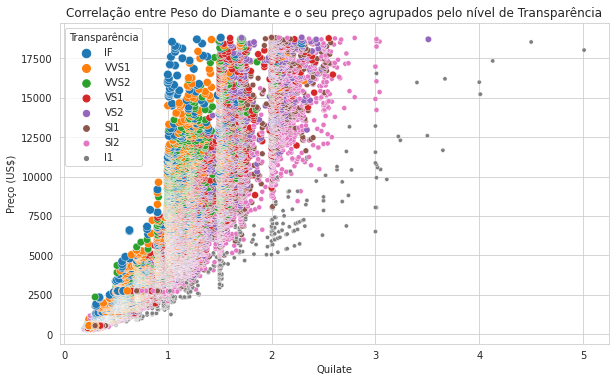

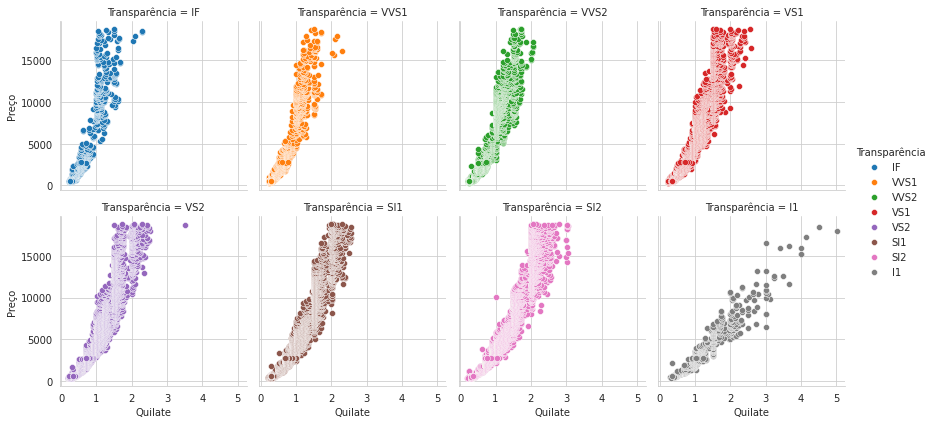

In [4]:
# gráfico do exercício 2

# Selecionando as colunas  do DataFrame:
df = data[['clarity','price','carat']]
# renomeando as colunas:
df = df.rename(columns={'clarity':'Transparência', 'price':'Preço', 'carat':'Quilate'})


with sns.axes_style('whitegrid'):
  # Criando o gráfico:
  diamonds =  diamonds = sns.scatterplot(data = df,  x='Quilate', y ='Preço', hue='Transparência', size="Transparência")
  # Atribuindo as informações ao gráfico:
  diamonds.set(title='Correlação entre Peso do Diamante e o seu preço agrupados pelo nível de Transparência', ylabel='Preço (US$)',xlabel='Quilate')
  # Definando o tamanho do gráfico (largura x altura):
  diamonds.figure.set_size_inches(w=25/2.54, h=15/2.54)

# Utilizando a biblioteca metplotlib para melhorar a visualização das informações:
import matplotlib.pyplot as plt

# Criando o gráfico com as informações separadas por nível de transparência:
# adicionado o gradeado (grid):
with sns.axes_style('whitegrid'):
  # Agrupando as informações através da coluna transparência:
  diamond = sns.FacetGrid(df, col = "Transparência", hue = "Transparência", col_wrap=4)
  diamond.map_dataframe(sns.scatterplot, x="Quilate", y="Preço")# Atribuindo as informações ao gráfico.
  diamond.add_legend()#adicionando a legenda.

  




**Insight do gráfico 2**: 

Observando o gráfico Correlação entre Peso do Diamante e o seu Preço, é possível compreender que a distribuição dos pontos de correlação entre os tipos de transparência estão distribuídos com maior frequência entre a faixa de 0 a 3 quilates, tendo apenas alguns pontos que ultrapassam essa faixa.
Se analisado cada tipo de transparência de forma individual, fica visível que os tipos IF e I1 são os extremos no quesito da variação do quilate. Visto que, o IF tem a sua distribuição de forma exponencial toda concentrada na faixa de 0 à 1.5 quilates. Já o I1 apresenta uma distribuição mais diagonal concentrada na faixa de 0 à 3 quilates, porém apresentando como diferencial alguns pontos que superam os outros tipos de transparência, chegando até a superar os 5 quilates.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [5]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
## Informações para auxiliar na analise do gráfico:
# import numpy as np
# import pandas as pd

# #Função que cria uma tabela com distribuição de freq. para muitos valores distintos:
# def dist_frequencia_classes(dataframe, nc='auto'):
#     #função histogram do numpy para calcular as freq. absolutas e número de classes:
#     frequencia_absoluta,classes= np.histogram(a = dataframe, bins=nc) 
#     frequencia_absoluta = frequencia_absoluta.astype(int)#pra transformar em int 
#     #freq. relativas = freq. absolutas/no. de dados do conjunto x 100 pra forma percentual
#     frequencia_relativa = np.around(frequencia_absoluta/frequencia_absoluta.sum()*100,decimals=2) #duas casas decimais
#     #freq. cumulativa usando a função cumsum do numpy
#     #frnorm = np.around(fi/(fi.sum() * np.diff(classes)),decimals=2)
#     frequencia_cumulada = np.cumsum(frequencia_absoluta).astype(int) #transforma  saída em inteiro.
#     # o laço a seguir serve unicamente para escrever os intervalos das classes como strings
#     # dentro de um vetor 'classe_str'
#     classe_str = []
#     for i in range(len(classes)):
#         if i<=len(classes)-2:
#             classe_str.append('{:2.2f} |-- {:2.2f}' .format(classes[i],classes[i+1]))
#         else:
#             break        
#     # a função retorna um dataframe, cujas linhas serão indexadas pelo vetor 'classe_str', e as 
#     #colunas terão as frequências absoluta (inteira), relativa (float) e cumulativa (int) calculadas 
#     return pd.DataFrame({'Classes':classe_str, 
#                          'Frequência Absoluta': frequencia_absoluta,
#                          'Frequência Retativa (%)': frequencia_relativa,
#                          #'frnorm':frnorm,
#                          'Frequência Cumulada': frequencia_cumulada
#                         }).set_index('Classes') # transforma a coluna 'Classes' nos indices das linhas 




# # Criando a tabela para auxiliar na analise das informações:
# dist_frequencia_classes(data['weight'])


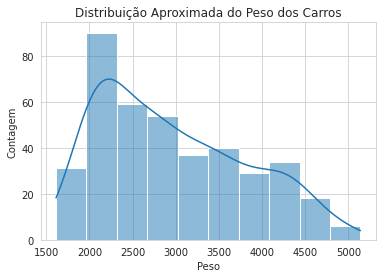

In [7]:
# gráfico do exercício 3

# Criando o gráfico de distribuição com grade:
with sns.axes_style('whitegrid'):
  # Selecionando o eixo X para determinar o peso, além de ativar o kde
  # para observar o movimento da :
  cars = sns.histplot(data=data, x='weight', kde=True)
  # Atribuindo as informações visuais do gráfico (titulo, no do eixos (x, y)):
  cars.set(title='Distribuição Aproximada do Peso dos Carros', xlabel='Peso', ylabel='Contagem')

**Insight do gráfico 3**:
Conforme o gráfico - Distribuição Aproximada do Peso dos Carros, é possível perceber que a contagem maior de veículos, está localizada entre as faixas de pesos mais leves (em outras palavras, detêm 58.79% dos veículos). Entre essas faixas mais leve, a que apresentou a maior contagem (ou seja, 90 carros) se encontram entre o intervalo de peso que vai de 1965.70 à 2318.40.
Por outro lado, os carro que apresentaram os maiores pesos (acima dos 4000 quilos), detendo apenas 14.57% dos veículos observados na base de dados. Entre eles, os mais pesos estão na faixa de peso que vai de 4787.30 à 5140.00 quilos, representando uma contagem de 6 veículos.	

---